Locate LEDs in dome image and find MSE from nominal positions
=

In [47]:
import imageio
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from scipy.spatial import KDTree

In [51]:
persistent_points = np.array(
[[331, 1153],
 [383, 1814],
 [479, 1451],
 [545, 2246],
 [688, 1854],
 [717, 975],
 [721, 1270],
 [728, 1593],
 [877, 2126],
 [891, 654],
 [962, 1324],
 [1055, 1044],
 [1062, 1903],
 [1222, 1264],
 [1247, 1671],
 [1265, 2255],
 [1318, 869],
 [1349, 1942],
 [1455, 1527],
 [1506, 1214],
 [1655, 1751],
#  [1744, 2117], this view is blocked in the images
 [1824, 1342]])

In [52]:
# image is name of png image 
# pixels brighter than threshold value will be marked as 'light'
# k is number of clusters for kmeans algorithm
def locate_lights(image, threshold, k, points):
    k = 22
    dome_image = imageio.imread(image, as_gray=True) # numpy array of image
    light_vals = dome_image[dome_image >= threshold]
    lights = np.where(dome_image >= threshold)
    coord_array = np.array(list(zip(lights[0], lights[1])))
    # array of centers of LEDs 
    kmeans = MiniBatchKMeans(n_clusters=k).fit(coord_array, sample_weight=light_vals).cluster_centers_
    plt.figure(dpi=250)
    plt.imshow(dome_image)
    for point in kmeans:
        plt.plot(point[1], point[0], "r,")
    for location in points:
        plt.plot(location[1], location[0], "b,")
    tree = KDTree(kmeans)
    dists, indices = tree.query(points)
    sorted_kmeans = kmeans[indices]
    plt.plot()
    plt.show()
    print(fr"MSE: {mean_squared_error(sorted_kmeans, points): .5f}")

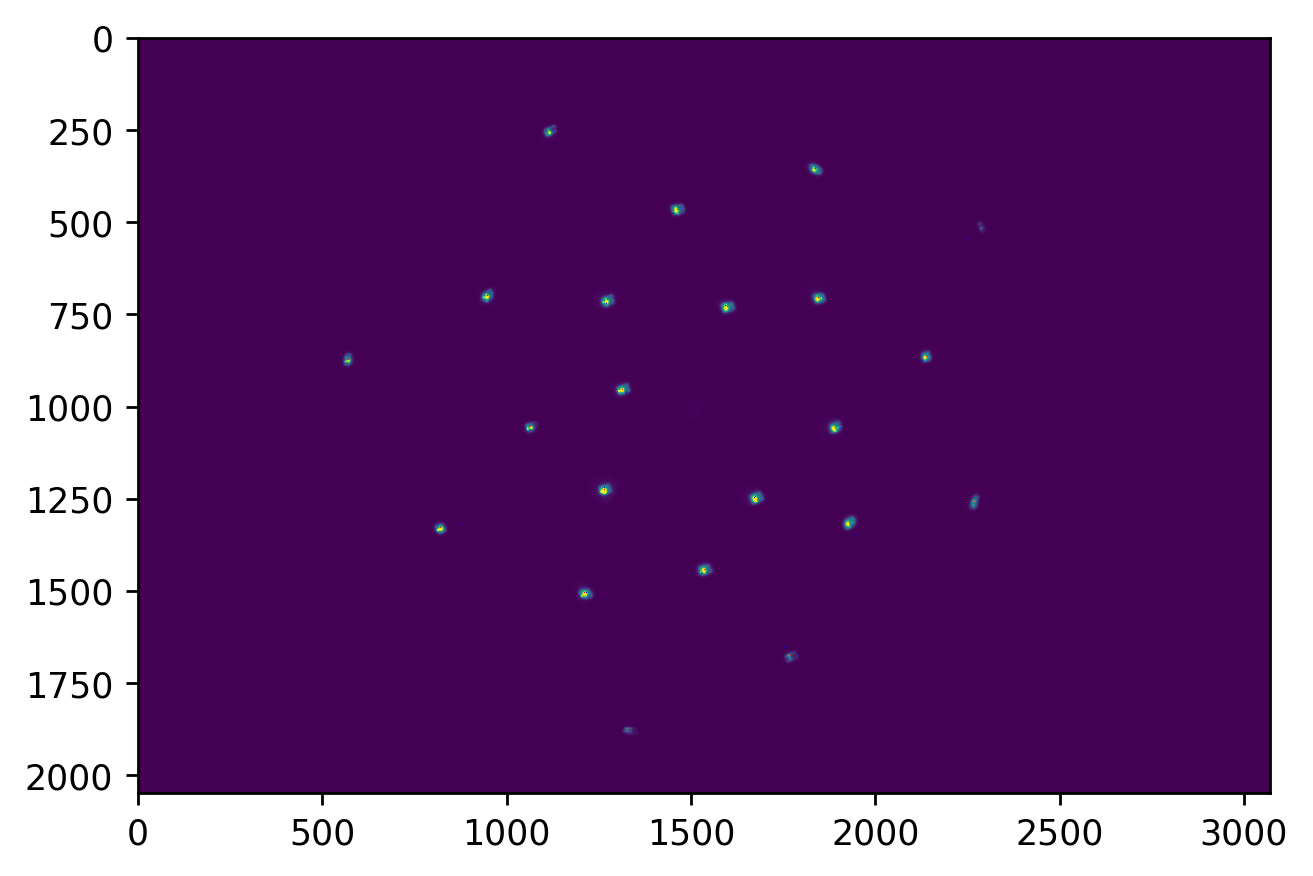

MSE:  677.83441


In [53]:
locate_lights('images/080521_dome_230_no_overlay.png', 10, 22, persistent_points)